In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
# Load the dataset
url = "https://raw.githubusercontent.com/deepanshuMeteor/ComputerVision/refs/heads/main/data.csv"
data = pd.read_csv(url)


In [0]:
# Check the first few rows of the dataset
print(data.head())
print(data.info())


         id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302         M  ...          0.4601                  0.11890
1    842517         M  ...          0.2750                  0.08902
2  84300903         M  ...          0.3613                  0.08758
3  84348301         M  ...          0.6638                  0.17300
4  84358402         M  ...          0.2364                  0.07678

[5 rows x 32 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          56

In [0]:
# Check for missing values
print(data.isnull().sum())

# Assuming 'diagnosis' is the target variable (replace it with the actual target variable name)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # Malignant: 1, Benign: 0

# Drop any unnecessary columns (e.g., ID columns)
data.drop(columns=['Unnamed: 32', 'id'], inplace=True)


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File <command-3552028998530074>, line 8
      5 data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # Malignant: 1, Benign: 0
      7 # Drop any unnecessary columns (e.g., ID columns)
----> 8 data.drop(columns=['Unnamed: 32', 'id'], inplace=True)

File /databricks/python/lib/python3.11/site-packages/pandas/util/_decorators.py:331, in deprecate_nonkeyword_arguments.<locals>.decorate.<locals>.wrapper(*args, **kwargs)
    325 if len(args) > num_allow_args:
    326     warnings.warn(
    327         msg.format(arguments=_format_argument_list(allow_args)),
    328         FutureWarning,
    329         stacklevel=find_stack_level(),
    330     )
--> 331 return func(*args, **kwargs)

File /databricks/python/lib/python3.11/site-packages/pandas/core/frame.py:5399, in DataFrame.drop(self, labels, axis, index, columns, level, inplace, e

In [0]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [0]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

RandomForestClassifier(random_state=42)

[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



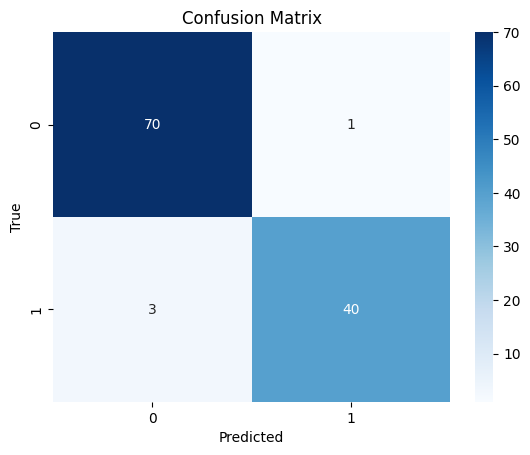

In [0]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
